In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 버젼 2. tensorflow 라면 아래 코드 필요
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
tf.__version__

'2.2.0'

In [16]:
def graph(w_number, x_number, step_number):
    y = 1
    yprime = 0
    x = tf.Variable(tf.random_uniform([x_number], minval = -1, maxval = 1), name = 'x')
    
    for i in range(1, w_number + 1):
        globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'weight{}'.format(i))
        y += globals()['w{}'.format(i)]*(x**i)  # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
        yprime += i*globals()['w{}'.format(i)]*(x**(i-1))  # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)
    
    cost = tf.reduce_mean(tf.square(yprime - y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
    train = optimizer.minimize(cost)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    for step in range(step_number + 1):
        for i in range(1, w_number + 1):
            globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
        cost_val, yprime_val, y_val, x_val, _ = sess.run([cost, yprime, y, x, train])
        if step % int(step_number / 5) == 0:
    #         print(step, "Cost: ", cost_val, "\nx: ", x_val,  "yprime: ", yprime_val, "y: ", y_val)
            print(step, "Cost: ", cost_val, "\n")
            print("w1: ", w1_val, "w2: ", w2_val, "w3: ", w3_val, "w4: ", w4_val, "w5: ", w5_val, "w6: ", w6_val, "\n")
            if cost_val > 0.5:
                step = 0
            
#         if cost_val == :
#             break
            
            
    def y(x):
        answer = 1
        for i in range(1, w_number + 1):
            answer += globals()['w{}_val'.format(i)]*(x**i)
        return answer[0]
    
    globals()['w{}x{}'.format(w_number, x_number)] = [x_val, y(x_val)]
    plt.plot(x_val, y(x_val), '.')
    plt.show()

0 Cost:  1.3960433 

w1:  [array([0.57665163], dtype=float32)] w2:  [array([1.6291932], dtype=float32)] w3:  [array([-0.05430273], dtype=float32)] w4:  [array([-0.00511152], dtype=float32)] w5:  [array([0.79915875], dtype=float32)] w6:  [array([-0.86129653], dtype=float32)] 

7000 Cost:  0.7365197 

w1:  [array([0.62954104], dtype=float32)] w2:  [array([1.5819322], dtype=float32)] w3:  [array([-0.06912118], dtype=float32)] w4:  [array([-0.00300821], dtype=float32)] w5:  [array([0.7562794], dtype=float32)] w6:  [array([-0.82908183], dtype=float32)] 

8000 Cost:  0.7061575 

w1:  [array([0.63768315], dtype=float32)] w2:  [array([1.5740087], dtype=float32)] w3:  [array([-0.06884307], dtype=float32)] w4:  [array([-0.00509103], dtype=float32)] w5:  [array([0.7538073], dtype=float32)] w6:  [array([-0.82778186], dtype=float32)] 

9000 Cost:  0.67853296 

w1:  [array([0.64571786], dtype=float32)] w2:  [array([1.5661409], dtype=float32)] w3:  [array([-0.06841626], dtype=float32)] w4:  [array([-

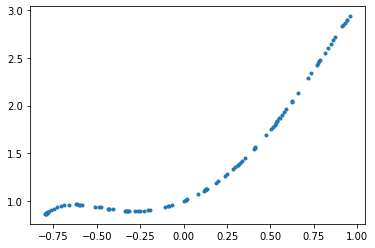

In [7]:
graph(6, 100, 30000)

0 Cost:  448.15488 

w1:  [array([-1.3892084], dtype=float32)] w2:  [array([0.279662], dtype=float32)] w3:  [array([1.1930159], dtype=float32)] w4:  [array([1.3350328], dtype=float32)] w5:  [array([0.45067677], dtype=float32)] w6:  [array([-0.16046168], dtype=float32)] 

6000 Cost:  6.4915977 

w1:  [array([-1.3219458], dtype=float32)] w2:  [array([0.21468627], dtype=float32)] w3:  [array([0.9782697], dtype=float32)] w4:  [array([1.255342], dtype=float32)] w5:  [array([0.15731655], dtype=float32)] w6:  [array([-0.24007322], dtype=float32)] 

12000 Cost:  4.327856 

w1:  [array([-1.2048113], dtype=float32)] w2:  [array([0.1368192], dtype=float32)] w3:  [array([0.91477984], dtype=float32)] w4:  [array([1.1950907], dtype=float32)] w5:  [array([0.05986371], dtype=float32)] w6:  [array([-0.2791577], dtype=float32)] 

18000 Cost:  3.3406875 

w1:  [array([-1.0877081], dtype=float32)] w2:  [array([0.06894215], dtype=float32)] w3:  [array([0.8787132], dtype=float32)] w4:  [array([1.1466672], d

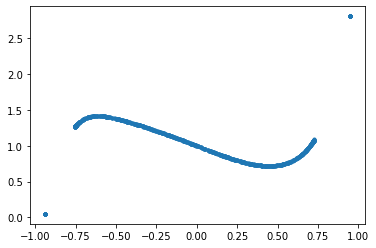

In [17]:
graph(60, 1000, 30000)

0 Cost:  1.5869613 

w1:  [array([1.0940142], dtype=float32)] w2:  [array([-0.06924665], dtype=float32)] w3:  [array([-1.0224724], dtype=float32)] w4:  [array([-0.30702692], dtype=float32)] w5:  [array([0.3478922], dtype=float32)] w6:  [array([-0.14387228], dtype=float32)] 

7000 Cost:  0.6092913 

w1:  [array([1.0928969], dtype=float32)] w2:  [array([0.0236393], dtype=float32)] w3:  [array([-0.9611079], dtype=float32)] w4:  [array([-0.1672629], dtype=float32)] w5:  [array([0.42777887], dtype=float32)] w6:  [array([0.02025731], dtype=float32)] 

8000 Cost:  0.5447775 

w1:  [array([1.0945926], dtype=float32)] w2:  [array([0.03201607], dtype=float32)] w3:  [array([-0.9519944], dtype=float32)] w4:  [array([-0.15472732], dtype=float32)] w5:  [array([0.4387714], dtype=float32)] w6:  [array([0.03477284], dtype=float32)] 

9000 Cost:  0.48937094 

w1:  [array([1.0964547], dtype=float32)] w2:  [array([0.03965736], dtype=float32)] w3:  [array([-0.9430747], dtype=float32)] w4:  [array([-0.14337

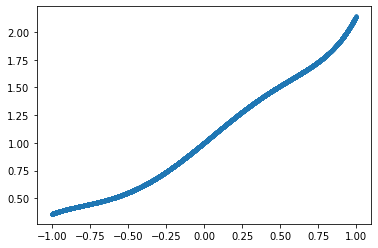

In [10]:
graph(6, 10000, 30000)

0 Cost:  9.938731 

w1:  [array([-0.88590163], dtype=float32)] w2:  [array([0.9088405], dtype=float32)] w3:  [array([0.34345934], dtype=float32)] w4:  [array([-0.23862648], dtype=float32)] w5:  [array([-1.0183637], dtype=float32)] w6:  [array([-0.34100154], dtype=float32)] 

7000 Cost:  2.948811 

w1:  [array([-0.566962], dtype=float32)] w2:  [array([0.7333345], dtype=float32)] w3:  [array([0.713893], dtype=float32)] w4:  [array([-0.3396932], dtype=float32)] w5:  [array([-0.6103083], dtype=float32)] w6:  [array([-0.394891], dtype=float32)] 

8000 Cost:  2.6223478 

w1:  [array([-0.53627574], dtype=float32)] w2:  [array([0.7221504], dtype=float32)] w3:  [array([0.74552464], dtype=float32)] w4:  [array([-0.33951095], dtype=float32)] w5:  [array([-0.5765296], dtype=float32)] w6:  [array([-0.38763973], dtype=float32)] 

9000 Cost:  2.3548038 

w1:  [array([-0.5078482], dtype=float32)] w2:  [array([0.71277916], dtype=float32)] w3:  [array([0.7738231], dtype=float32)] w4:  [array([-0.3376416

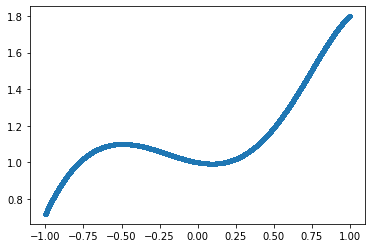

In [11]:
graph(6, 100000, 30000)

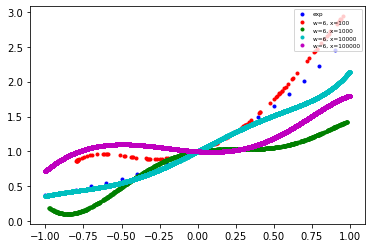

In [12]:
x = np.array([i for i in range(-10, 10, 1)])
plt.plot(0.1*x, np.exp(0.1*x), '.b', label = 'exp')
plt.plot(w6x100[0],w6x100[1], '.r', label = 'w=6, x=100')
plt.plot(w6x1000[0],w6x1000[1], '.g', label = 'w=6, x=1000')
plt.plot(w6x10000[0],w6x10000[1], '.c', label = 'w=6, x=10000')
plt.plot(w6x100000[0],w6x100000[1], '.m', label = 'w=6, x=100000')
plt.legend(loc = 'upper right', fontsize = 'xx-small')

plt.show()